In [1]:
"""
Created on 05/01/2023
Group 2
Authors: S.V.
License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt
"""

'\nCreated on 05/01/2023\nGroup 2\nAuthors: S.V.\nLicense: this code is released under the CeCILL 2.1 license. See\nhttps://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt\n'

In [2]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data frames

In [3]:
data = pd.read_csv("data_v6.csv")
# data with only target 171
data_validation = data[(data['target'] == 171)]

In [4]:
train = pd.read_csv("train_v1.csv")
train

,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,...,loc_target_x,loc_target_y,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,label,orientation
0,3.343054,365856281230,366109690736,366214474894,365961067043,0.738329,827,788.817435,3.878915,3.699826,...,-3.962,7.931,40.955002,39.719997,-79.110634,-78.782089,-79.612926,-79.168550,2,270.0
1,3.412559,439903193230,440156567265,440260920462,440007548089,-0.246110,831,843.841157,3.897677,3.957906,...,-3.962,7.931,40.669998,40.099998,-79.014297,-79.379700,-78.223288,-78.872428,2,270.0
2,3.200211,513885729934,514139068270,514243469966,513990133285,0.338401,827,809.835204,3.878915,3.798406,...,-3.962,7.931,41.240002,40.480000,-78.842041,-78.432024,-78.928902,-78.734322,2,270.0
3,2.593814,587881292430,588134594890,588238476430,587985175617,-0.707565,823,860.251461,3.860154,4.034876,...,-3.962,7.931,40.669998,40.099998,-79.527504,-79.961979,-78.904259,-79.464581,2,270.0
4,3.799431,661802355342,662055621862,662159892110,661906627251,0.953674,830,780.780071,3.892986,3.662128,...,-3.962,7.931,40.955002,39.719997,-79.231667,-78.998866,-78.672676,-78.967736,2,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2.881093,632336656526,632576640339,632681204878,632441222856,3.230187,895,726.618482,4.197859,3.408091,...,-1.190,4.578,34.115002,33.259998,-79.021942,-79.659729,-79.297910,-79.326527,0,0.0
2565,2.570528,695535095438,695774857291,695878825102,695639065062,3.691643,906,714.594004,4.249453,3.351692,...,-1.190,4.578,33.830002,33.259998,-79.952789,-79.592006,-79.451646,-79.665480,0,0.0
2566,2.779013,758783372430,759022911289,759126729870,758887192820,4.183862,904,687.318717,4.240072,3.223762,...,-1.190,4.578,34.115002,33.259998,-79.927406,-79.456124,-79.850138,-79.744556,0,0.0
2567,3.019182,822043011214,822282326290,822386827406,822147514124,3.937752,897,691.250260,4.207239,3.242202,...,-1.190,4.578,34.400002,33.259998,-78.940331,-79.446260,-79.533437,-79.306676,0,0.0


In [6]:
test = pd.read_csv("test_v1.csv")
test

,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,...,loc_target_x,loc_target_y,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,label,orientation
0,20.052750,958585021070,958973595867,959077448334,958688875846,-1.107493,1154,1212.007927,5.412658,5.684735,...,-3.132,4.339,30.410000,27.559999,-79.081566,-79.231050,-78.998866,-79.103827,1,0.0
1,18.801702,1021861150862,1022249829124,1022353090702,1021964414740,-1.907349,1150,1248.477915,5.393897,5.855792,...,-3.132,4.339,30.980000,27.559999,-79.560959,-79.215381,-78.859786,-79.212042,1,0.0
2,19.264353,1085306097806,1085694879388,1085798285966,1085409506691,-2.276513,1153,1271.203204,5.407968,5.962381,...,-3.132,4.339,30.980000,27.559999,-79.437157,-79.164291,-79.278961,-79.293470,1,0.0
3,18.024691,49069009550,49457893830,49560945806,49172063842,-1.384366,1158,1229.330823,5.431419,5.765985,...,-3.132,4.339,31.264999,27.559999,-79.349068,-78.972993,-79.260394,-79.194152,1,0.0
4,21.375772,112287082126,112676068701,112779380878,112390396613,-2.184222,1155,1267.828356,5.417348,5.946552,...,-3.132,4.339,31.264999,27.559999,-79.330444,-79.289938,-78.819377,-79.146586,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,3.011880,350701621902,351219630882,351323385998,350805378924,-2.153458,953,1064.716149,4.469899,4.993886,...,-3.132,4.339,41.525002,36.680000,-79.887100,-79.479927,-79.381566,-79.582864,2,0.0
702,3.397784,424635705486,425153876958,425256490126,424738320561,-1.753530,953,1043.467644,4.469899,4.894223,...,-3.132,4.339,41.810001,37.060001,-80.247940,-79.410166,-79.275671,-79.644592,2,0.0
703,2.496211,498609368718,499127702604,499230964878,498712632908,-1.722767,958,1046.948394,4.493351,4.910549,...,-3.132,4.339,41.810001,37.060001,-79.772240,-79.753873,-79.446260,-79.657458,2,0.0
704,2.395657,572598296206,573116792513,573219775630,572701281240,-2.091931,958,1066.216775,4.493351,5.000925,...,-3.132,4.339,41.240002,36.680000,-80.192848,-79.415527,-79.865237,-79.824537,2,0.0


In [7]:
validation = pd.read_csv("validation_v1.csv")
validation

,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,...,loc_target_x,loc_target_y,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,label,orientation
0,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,8.187508,...,-3.962,7.931,30.980000,30.220001,-80.136574,-80.077130,-79.836296,-80.016667,2,270.0
1,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,7.914943,...,-3.962,7.931,30.980000,29.840002,-80.267769,-79.988684,-79.835720,-80.030724,2,270.0
2,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,7.855350,...,-3.962,7.931,30.980000,29.840002,-79.964310,-79.850138,-79.693502,-79.835983,2,270.0
3,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,7.911249,...,-3.962,7.931,30.980000,29.840002,-80.040833,-79.818313,-79.849525,-79.902890,2,270.0
4,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,7.905280,...,-3.962,7.931,30.980000,29.840002,-79.999908,-80.102552,-80.022316,-80.041592,2,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2.147484,418111340686,418673964962,418776737934,418214115605,-9.813616,973,1477.787259,4.563705,6.931332,...,2.120,2.793,41.525002,46.939999,-80.600258,-80.461719,-80.266779,-80.442919,0,119.0
1483,2.684614,492165176974,492728503852,492831573646,492268248699,-9.844380,965,1472.829111,4.526183,6.908077,...,2.120,2.793,41.810001,46.939999,-80.172737,-80.323799,-80.153646,-80.216727,0,119.0
1484,3.347088,566225466510,566789495974,566892461198,566328433670,-9.690562,968,1466.895423,4.540254,6.880246,...,2.120,2.793,42.095001,46.939999,-80.249947,-80.552361,-80.135295,-80.312534,0,119.0
1485,2.956217,640277920398,640842652337,640945570958,640380840955,-9.567507,968,1460.337306,4.540254,6.849486,...,2.120,2.793,41.240002,46.939999,-80.517792,-80.484470,-80.174817,-80.392360,0,119.0


# Linear Regression to have x as a function of y of the form x=a*y+b with x : loc_initiator_y and y : loc_initiator_x

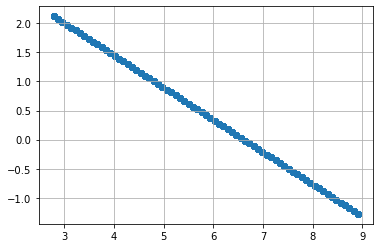

a =  -0.5548735684921144  et b =  3.6697196927161606
loc_iniatiator_y =  -0.5548735684921144  * loc_initiator_x +  3.6697196927161606


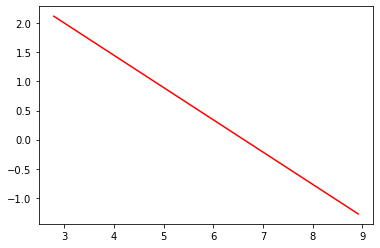

In [8]:
# Linear Regression to have x as a function of y of the form x=a*y+b
# with x : loc_initiator_y and y : loc_initiator_x
# a= -0.5548 et b= 3.6679

from scipy import stats

def predict(y):
    return slope * y + intercept

X =  data.loc_initiator_y
Y =  data.loc_initiator_x

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

print("a = ", slope, " et b = ", intercept)
print("loc_iniatiator_y = ", slope, " * loc_initiator_x + ", intercept)

# Linear regression

### y : loc_initiator_y

In [9]:
# data without target 171
data_lr = data.drop(data[(data['target'] == 171)].index)   
X = data_lr.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y = data_lr.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2431, 21)
(811, 21)
(2431,)
(811,)


In [10]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model_y = LinearRegression()
linear_model_y.fit(X_train, y_train)

LinearRegression()

In [11]:
# Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model_y.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mae_train = mean_absolute_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The mean absolute error  is {}".format(mae_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
y_test_predict = linear_model_y.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae_test = mean_absolute_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The mean absolute error  is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 0.468767161101947
The mean absolute error  is 0.35518012910163177
The R-squared is 0.928830850127191


Model performance based on testing set : 
--------------------------------------
The mean squared error is 0.48672012209667453
The mean absolute error  is 0.3623759051298577
The R-squared is 0.9259310476401976


In [12]:
a_y = linear_model_y.coef_
b_y = linear_model_y.intercept_

print('coefficients :', a_y)
print('intercept :', b_y)

coefficients : [-2.19542450e-01  2.93010230e-05  5.66200608e-02 -5.66201204e-02
  5.66201419e-02 -5.66200823e-02  3.81454670e-01  1.03625619e-01
  4.84603799e-03  4.86313727e-04  2.31179582e-05  2.42505688e+00
 -2.53381896e+00 -1.33226763e-15  4.70929426e-01 -3.88778626e-01
 -2.09053570e-02  3.29270133e-02  7.16994594e-03  6.39720074e-03
  6.28290165e-02]
intercept : 32.4235639854315


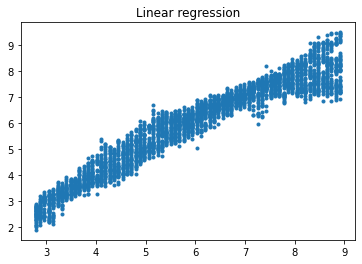

In [13]:
plt.plot(y, linear_model_y.predict(X),'.')
plt.title("Linear regression")
plt.show()

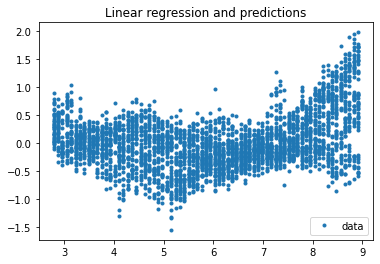

In [14]:
plt.plot(y, y-linear_model_y.predict(X), '.', label="data")
#plt.plot(X, a_y * X + b_y, "r-", label="regression")
plt.title("Linear regression and predictions")
plt.legend(loc="lower right")
plt.show()

### y : loc_initiator_x

In [15]:
# data without target 171
data_lr = data.drop(data[(data['target'] == 171)].index)   
X = data_lr.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y = data_lr.loc_initiator_x

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2431, 21)
(811, 21)
(2431,)
(811,)


In [16]:
# model training
linear_model_x = LinearRegression()
linear_model_x.fit(X_train, y_train)

# Evaluation of the training set
y_train_predict = linear_model_x.predict(X_train)

# model evaluation for testing set
y_test_predict = linear_model_x.predict(X_test)

In [17]:
a_x = linear_model_x.coef_
b_x = linear_model_x.intercept_

print('coefficients :', a_x)
print('intercept :', b_x)

coefficients : [ 1.21825582e-01 -1.47984978e-05 -3.14591781e-02  3.14592110e-02
 -3.14592230e-02  3.14591900e-02 -2.12960233e-01 -5.75584586e-02
 -2.71387197e-03 -2.70122131e-04 -1.29448569e-05 -1.34566900e+00
  1.40599737e+00  6.66133815e-16 -2.61280421e-01  2.15710400e-01
  1.15928856e-02 -1.82728699e-02 -3.97526273e-03 -3.55174901e-03
 -3.48636273e-02]
intercept : -14.334371695665606


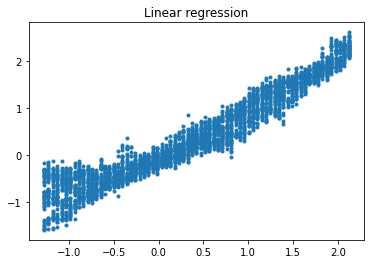

In [18]:
plt.plot(y, linear_model_x.predict(X),'.')
plt.title("Linear regression")
plt.show()

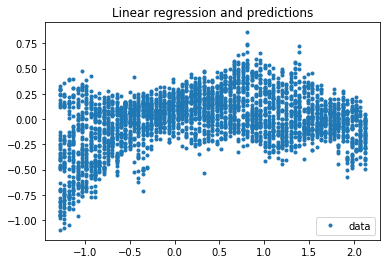

In [19]:
plt.plot(y, y-linear_model_x.predict(X), '.', label="data")
#plt.plot(X, a_x * X + b_x, "r-", label="regression")
plt.title("Linear regression and predictions")
plt.legend(loc="lower right")
plt.show()

## Linear regression for Train and Test

In [20]:
X_train = train.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y_train = train.loc_initiator_y
X_test = test.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y_test = test.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

linear_model_y = LinearRegression()
linear_model_y.fit(X_train, y_train)

(2569, 20)
(706, 20)
(2569,)
(706,)


LinearRegression()

In [21]:
y_train = train.loc_initiator_x
y_test = test.loc_initiator_x

# train base and test base
from sklearn.model_selection import train_test_split
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

linear_model_x = LinearRegression()
linear_model_x.fit(X_train, y_train)

(2569, 20)
(706, 20)
(2569,)
(706,)


LinearRegression()

# Cross-validation

### y : loc_initiator_y

In [22]:
y = data_lr.loc_initiator_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
model = LinearRegression()

# dictionary with possible parameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model, parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.9277643205044391
Residual sum of squares: 0.24


In [23]:
print(" Results from Grid Search ")
print("\n The best estimator across all searched params :\n", grid.best_estimator_)
print("\n The best score across all searched params :\n", grid.best_score_)
print("\n The best parameters across all searched params :\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across all searched params :
 LinearRegression(fit_intercept=False, normalize=True)

 The best score across all searched params :
 0.9277643205044391

 The best parameters across all searched params :
 {'copy_X': True, 'fit_intercept': False, 'normalize': True}


### y : loc_initiator_x

In [24]:
y = data_lr.loc_initiator_x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
model = LinearRegression()

# dictionary with possible parameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model, parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.9277607370996745
Residual sum of squares: 0.07


In [25]:
print(" Results from Grid Search ")
print("\n The best estimator across all searched params :\n", grid.best_estimator_)
print("\n The best score across all searched params :\n", grid.best_score_)
print("\n The best parameters across all searched params :\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across all searched params :
 LinearRegression(fit_intercept=False, normalize=True)

 The best score across all searched params :
 0.9277607370996745

 The best parameters across all searched params :
 {'copy_X': True, 'fit_intercept': False, 'normalize': True}


# Scores

### Validation

In [26]:
# X validation values : validation data without loc_initiator_x and loc_initiator_y 
X_val = validation.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)

# X and Y predicted
Y_prev = linear_model_y.predict(X_val)
X_prev = linear_model_x.predict(X_val)

# X and Y observed
X_obs = validation.loc_initiator_x
Y_obs = validation.loc_initiator_y

In [27]:
print('X_obs :', X_obs.shape)
print('X_prev :', X_prev.shape)
print('Y_obs :', Y_obs.shape)
print('Y_prev :', Y_prev.shape)

X_obs : (1487,)
X_prev : (1487,)
Y_obs : (1487,)
Y_prev : (1487,)


In [28]:
def score_distanceM(Xobserve,Yobserve,Xprevu,Yprevu):
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

In [29]:
print('Score distance :', score_distanceM(X_obs, Y_obs, X_prev, Y_prev))

Score distance : 0.8053538712508629


In [30]:
rmse_val = (np.sqrt(mean_squared_error(Y_obs, Y_prev)))  # RMSE
mae_val = mean_absolute_error(Y_obs, Y_prev)  # MAE
r2_val = r2_score(Y_obs, Y_prev)
 
print("Model performance based on validating set : ")
print("--------------------------------------")
print("The mean squared error (RMSE) is {}".format(rmse_val))
print("The mean absolute error (MAE) is {}".format(mae_val))
print("The R-squared is {}".format(r2_val))

Model performance based on validating set : 
--------------------------------------
The mean squared error (RMSE) is 0.8704094892877863
The mean absolute error (MAE) is 0.7042065112060506
The R-squared is 0.7458066378680808


### Test

In [31]:
# X test values : test data without loc_initiator_x and loc_initiator_y 
X_test = test.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)

# X and Y predicted
Y_test_pred = linear_model_y.predict(X_test)
X_test_pred = linear_model_x.predict(X_test)

# X and Y observed
X_test_obs = test.loc_initiator_x
Y_test_obs = test.loc_initiator_y

In [32]:
print('Score distance :', score_distanceM(X_test_obs, Y_test_obs, X_test_pred, Y_test_pred))

Score distance : 4.252173670422037


In [33]:
rmse_test = (np.sqrt(mean_squared_error(Y_test_obs, Y_test_pred)))
mae_test = mean_absolute_error(Y_test_obs, Y_test_pred)
r2_test = r2_score(Y_test_obs, Y_test_pred)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error (RMSE) is {}".format(rmse_test))
print("The mean absolute error (MAE) is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))

Model performance based on testing set : 
--------------------------------------
The mean squared error (RMSE) is 3.807924716830449
The mean absolute error (MAE) is 3.717994799645979
The R-squared is -3.521312680624537


## With only interesting features

### y : initiator_y

In [84]:
X = data_lr[['nlos_indicator', 't1', 't2', 't3', 't4', 'skew', 'tof', 'tof_skew', 'loc_target_x', 'loc_target_y', 'rssi_request', 'rssi_ack', 'rssi_data', 'rssi_mean']]
Y = data_lr.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2431, 14)
(811, 14)
(2431,)
(811,)


In [85]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model_init_y = LinearRegression()
linear_model_init_y.fit(X_train, Y_train)

LinearRegression()

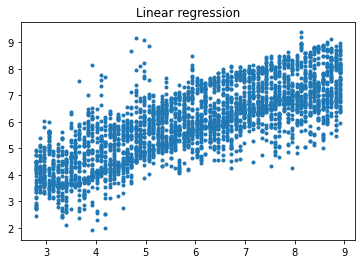

In [86]:
plt.plot(Y, linear_model_init_y.predict(X),'.')
plt.title("Linear regression")
plt.show()

In [87]:
# Evaluation of the training set
Y_train_predict = linear_model_init_y.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
mae_train = mean_absolute_error(y_train, y_train_predict)
r2_train = r2_score(Y_train, Y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The mean absolute error  is {}".format(mae_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
Y_test_predict = linear_model_init_y.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
mae_train = mean_absolute_error(Y_test, Y_test_predict)
r2_test = r2_score(Y_test, Y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The mean absolute error  is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 1.1027042678844654
The mean absolute error  is 0.1970818936889964
The R-squared is 0.6061820303437528


Model performance based on testing set : 
--------------------------------------
The mean squared error is 1.1382060314935698
The mean absolute error  is 0.20106278995338764
The R-squared is 0.5949399941344959


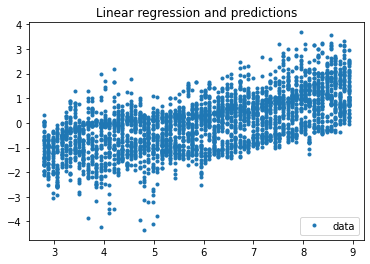

In [88]:
a = linear_model_init_y.coef_
b = linear_model_init_y.intercept_
plt.plot(Y, Y-linear_model_init_y.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression and predictions")
plt.legend(loc="lower right")
plt.show()

### y : initiator_x

In [89]:
X = data_lr[['nlos_indicator', 't1', 't2', 't3', 't4', 'skew', 'tof', 'tof_skew', 'loc_target_x', 'loc_target_y', 'rssi_request', 'rssi_ack', 'rssi_data', 'rssi_mean']]
Y = data_lr.loc_initiator_x

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2431, 14)
(811, 14)
(2431,)
(811,)


In [90]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model_init_x = LinearRegression()
linear_model_init_x.fit(X_train, Y_train)

LinearRegression()

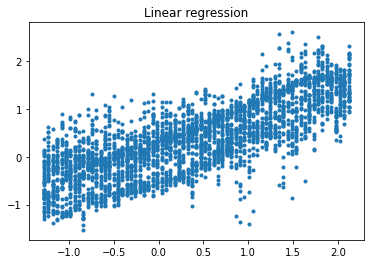

In [91]:
plt.plot(Y, linear_model_init_x.predict(X),'.')
plt.title("Linear regression")
plt.show()

In [92]:
# Evaluation of the training set
from sklearn.metrics import r2_score
Y_train_predict = linear_model_init_x.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
mae_train = mean_absolute_error(y_train, y_train_predict)
r2_train = r2_score(Y_train, Y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The mean absolute error  is {}".format(mae_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
Y_test_predict = linear_model_init_x.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
mae_train = mean_absolute_error(Y_test, Y_test_predict)
r2_test = r2_score(Y_test, Y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The mean absolute error  is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 0.6118806948322271
The mean absolute error  is 0.1970818936889964
The R-squared is 0.6061628549450775


Model performance based on testing set : 
--------------------------------------
The mean squared error is 0.6315537689196001
The mean absolute error  is 0.20106278995338764
The R-squared is 0.594933678349927
